<a href="https://colab.research.google.com/github/OscarRojasG/Experimentos-GPTValidator/blob/main/Framework_Experimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Framework para experimentos GPTValidator

El objetivo de este framework consiste en proporcionar un conjunto de funciones previamente implementadas para facilitar la evaluación y comparación de prompts para el proyecto EvaluAI.

## Instrucciones de uso

Para la utilización del framework, se deben ejecutar **todas** las celdas de código. Una vez hecho esto, se creará una carpeta llamada **Experiments** con la siguiente estructura interna:

```
Experiments/
├── Datasets
├── Miniprompts
│   ├── Ejemplos
│   ├── Contexto
│   ├── Pregunta
│   ├── Respuesta
│   ├── Criteria
│   ├── Reflection
│   └── Feedback
└── Results
```

**Datasets**: Contiene datasets en formato *xlsx* con las siguientes columnas:

* Pregunta
* Respuesta real o contexto
* Respuesta del estudiante
* Evaluación manual (puntaje 0-3)

**Miniprompts**: Cada prompt se construye en base a una serie de miniprompts previamente definidos. Estos miniprompts deben ir en formato *txt* dentro de la carpeta correspondiente. Se pueden usar los strings `{context}`, `{question}` y `{answer}` como *placeholders* para reemplazar el contexto, la pregunta y la respuesta del estudiante respectivamente.

**Results**: Resultados de los experimentos en formato *json*.

## Funciones

### Experiment

`
experiment(dataset, sheet_name, column_data, prompt_data, criteria, repetitions, eval_function, eval_params=None)
`

Evalúa un prompt a partir de un dataset y retorna las métricas de evaluación.

Parámetros:

- **dataset** - Nombre del archivo xlsx con el dataset a utilizar.

- **sheet_name** - Nombre de la hoja donde se encuentran los datos.

- **column_data** - Diccionario para asociar las columnas obligatorias del dataset (clave) con su nombre real (valor). Debe tener las siguientes claves: *question*, *context*, *answer*, *real_eval*.

- **prompt_data** - Diccionario para especificar la estructura del prompt. Las claves almacenan el nombre del miniprompt al cual se hace referencia, por ejemplo, *examples*, *context*. El valor de cada clave corresponde al archivo *txt* donde se define el miniprompt a utilizar y que se encuentra en la carpeta del miniprompt correspondiente. La clave reservada *instructions* contiene un diccionario anidado donde se definen los miniprompts para las instrucciones del modelo (reflection, feedback, score).
<br>Se puede cambiar el orden de las claves y agregar o quitar miniprompts según sea necesario. Además, se puede usar el comodín \* como valor para evaluar todos los miniprompts que existan dentro de la carpeta.

- **criteria** - Lista con los criterios a evaluar, por ejemplo, *correctness*, *completeness*, *clarity*.

- **repetitions** - Cantidad de veces a repetir el experimento.

- **eval_function** - Método a utilizar para calcular los puntajes finales obtenidos por GPT. Puede ser *cuts* o *map*.

 - *cuts* pondera cada criterio y retorna valores discretos entre 0 y 3 dependiendo de los puntajes de corte.
 - *map* pondera cada criterio y mapea los puntajes a valores continuos entre 0 y 3.

- **eval_params** *(opcional)* - Lista con los parámetros a utilizar para el método *eval_function* elegido. Si es *None*, se calculan automáticamente los parámetros óptimos que minimicen el MSE. Dependiendo de *eval_function*, las listas deben contener los siguientes parámetros en orden:

 - *cuts* - $[w_1, w_2, ..., w_m, a, b, c]$ - donde $w_i$ corresponde a la ponderación del criterio $i$ especificado en la lista *criteria*, mientras que $a$, $b$ y $c$ son los puntajes de corte ordenados de menor a mayor.

 - *map* - $[w_1, w_2, ..., w_m, a, b]$ - donde $w_i$ corresponde a la ponderación del criterio $i$ especificado en la lista *criteria*, $a$ es el puntaje 0-10 equivalente a 1 en escala 0-3, $b$ es el puntaje 0-10 equivalente a 2 en escala 0-3.


### visualize_prompt

`
visualize_prompt(prompt_data)
`

Permite previsualizar un prompt antes de un experimento.

Parámetros:

- **prompt_data** - Diccionario para especificar la estructura del prompt.


### show_results

`
show_results(dir)
`

Imprime los resultados de un experimento previamente realizado.

Parámetros:

* **dir** - Ruta a la carpeta con los datos del experimento, por ejemplo, *Experiments/Results/20240622-1520*

### download

`
download()
`

Descarga la carpeta con los experimentos. Debe encontrarse en la raíz del proyecto con el nombre "Experiments".









## Resultados

Los resultados de los experimentos se guardarán en la carpeta *Experiments/Results*. Cada experimento estará asociado a una carpeta identificada por la fecha de ejecución del experimento. Dentro de ella, se encuentran las estadísticas obtenidas en formato *json* para cada uno de los prompts evaluados.

```
Experiments
└── Results
    └── 20240723-1328
        ├── examples_1.json
        ├── examples_2.json
        └── examples_3.json
```

En caso de usar el comodín * en el diccionario *prompt_data*, el nombre de cada archivo corresponderá al miniprompt utilizado para ese prompt en particular. En caso contrario, la carpeta contendrá un único archivo con el nombre de *results.json*

Cada archivo *json* presentará una estructura como la del siguiente ejemplo:

```
{
    "filename": "datasets.xlsx",
    "sheet_name": "Control3-2024",
    "dataset_size": 100,
    "prompt": "Examples: ... Context: ... Question: ... Answer: ... Instructions: ...",
    "field": "examples",
    "field_id": "examples_1.json",
    "eval_function": "map",
    "results" [
        {
            "real_scores": [0, 2, 1, 2, ..., 3],
            "gpt_scores": [0.54, 1.57, 1.13, 1.55, ..., 2.67],
            "sample_size": 99,
            "params": {
                "weights": {
                    "correctness": 0.53,
                    "completeness": 0.22,
                    "clarity": 0.25
                }
                "a": 5.42,
                "b": 7.24
            },
            "stats": {
                "mse": 0.89,
                "mae": 0.77,
                "r2": 0.78
            }
        },
        ...
        {
            ...
        }
    ]
}
```

### Descripción de los campos

* **filename** - Nombre del archivo xlsx.
* **sheet_name** - Nombre de la hoja utilizada.
* **dataset_size** - Tamaño real del dataset.
* **prompt** - Prompt final utilizado.
* **field** - Miniprompt sin especificar (comodín)
* **field_id** - Archivo utilizado para reemplazar el comodín.
* **eval_function** - Función utilizada para optimizar los puntajes.
* **results** - Lista con los datos de cada iteración.
    * **real_scores** - Puntajes reales del dataset.
    * **gpt_scores** - Puntajes calculados por el modelo.
    * **sample_size** - Tamaño de la muestra final. Generalmente es igual a *dataset_size* a no ser que ocurran errores al procesar algunas respuestas de la API (errores en la generación del output/diccionario).
    * **params** - Parámetros asociados a la función de evaluación (map/cuts).
    * **stats** - Métricas de evaluación del prompt. Estas son: MAE, MSE y R². Para la función de evaluación *cuts* se añade la exactitud (accuracy) y la matriz de confusión.

# Implementación

In [1]:
!pip install openai==0.28 &> /dev/null
!pip install openai-multi-client &> /dev/null
!git clone https://github.com/rilianx/GPTEvaluator &> /dev/null

In [3]:
from scipy.optimize import differential_evolution
import numpy as np

gpt_dicts = [
    {
        'relevance': 10,
        'clarity': 8,
        'precision': 7
    },
    {
        'relevance': 3,
        'clarity': 6,
        'precision': 4
    }
]

real_scores = [3, 2]
criteria = ['relevance', 'clarity', 'precision']

class Optimizer():
    def __init__(self, gpt_dicts, real_scores, criteria):
        self.gpt_dicts = gpt_dicts
        self.real_scores = real_scores
        self.criteria = criteria

    def get_x(self):
        return [
            [gpt_dict[key] for key in self.criteria]
            for gpt_dict in self.gpt_dicts
        ]

    def get_weight_bounds(self):
        return [(0, 1) for _ in range(len(self.criteria))]


### Optimización de cortes y ponderaciones ###
class CutsOptimizer(Optimizer):
    def __init__(self, gpt_dicts, real_scores, criteria, eval_params):
        super().__init__(gpt_dicts, real_scores, criteria)

        if eval_params == None:
            bounds = self.get_weight_bounds() + [(1, 4), (4, 7), (7, 10)]
            result = differential_evolution(self.error, bounds, args=(self.get_x(), real_scores), seed=1, strategy='rand1exp', mutation=(0,1), recombination=1)
            self.params = result.x.tolist()
        else:
            self.params = eval_params

    def f(self, x, theta):
        score = np.dot(x, theta[:-3])
        y_pred = np.where(score > theta[-1], 3, np.where(score > theta[-2], 2, np.where(score > theta[-3], 1, 0)))
        return y_pred

    def error(self, theta, x, y):
        y_pred = self.f(x, theta)
        mse = np.mean((y - y_pred) ** 2)
        penalty = 1e6 * np.abs(np.sum(theta[:-3]) - 1)
        return mse + penalty

    def get_parameters(self):
        params = [round(p, 2) for p in self.params]
        return {
            "weights": dict(zip(criteria, params[:-2])),
            "cuts": params[-3:]
        }

    def get_scores(self):
        return self.f(self.get_x(), self.params).tolist()


####### Optimización mapeo de puntajes ########
class MapOptimizer(Optimizer):
    def __init__(self, gpt_dicts, real_scores, criteria, eval_params=None):
        super().__init__(gpt_dicts, real_scores, criteria)

        if eval_params == None:
            bounds = self.get_weight_bounds() + [(1, 9), (1, 9)]
            result = differential_evolution(self.error, bounds, args=(self.get_x(), real_scores), seed=1, strategy='rand1exp', mutation=(0,1), recombination=1)
            self.params = result.x.tolist()
        else:
            self.params = eval_params

    def inverse_map(self, y_pred, theta):
        a, b = theta[-2], theta[-1]
        def single_inverse_map(y):
            if y <= a:
                return y / a
            elif a < y <= b:
                return 1 + (y - a) / (b - a)
            else:
                return min(10, 2 + (y - b) / (10 - b))

        return np.array([single_inverse_map(y) for y in y_pred])

    def f(self, x, theta):
        return np.dot(x, theta[:-2])

    def error(self, theta, x, y):
        y_pred = self.f(x, theta)
        mse = np.sum((y - self.inverse_map(y_pred, theta)) ** 2)
        penalty = 1e6 * np.abs(np.sum(theta[:-2]) - 1)
        a, b = theta[-2], theta[-1]
        if a > b: penalty += (a - b) * 1e5
        return mse + penalty

    def get_parameters(self):
        params = [round(p, 2) for p in self.params]
        return {
            "weights": dict(zip(self.criteria, params[:-2])),
            "a": params[-2],
            "b": params[-1]
        }

    def get_scores(self):
        y_pred = self.f(self.get_x(), self.params)
        return [round(n, 2) for n in self.inverse_map(y_pred, self.params)]


# Función para convertir puntajes GPT a puntajes reales entre 0 y 3
def convert_scores(gpt_dicts, real_scores, criteria, eval_function, eval_params=None):
    if eval_function == "map":
        optimizer = MapOptimizer(gpt_dicts, real_scores, criteria, eval_params)
    if eval_function == "cuts":
        optimizer = CutsOptimizer(gpt_dicts, real_scores, criteria, eval_params)

    return optimizer.get_scores(), optimizer.get_parameters()

In [ ]:
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, r2_score, accuracy_score
from GPTEvaluator.GPTEvaluator import chat_gpt_multiple
from openai_multi_client import OpenAIMultiClient
from datetime import datetime, timedelta
from google.colab import userdata, files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openai
import shutil
import getpass
import json
import copy
import re
import os

openai.api_key = userdata.get('api_key')

# Retorna un diccionario con el contenido de cada miniprompt
def read_miniprompts(data):
    def read_file(folder, filename):
        path = f"Experiments/Miniprompts/{folder}/{filename}"
        try:
            return open(path, 'r', encoding='utf-8').read()
        except:
            raise Exception(f"Error: El archivo {path} no existe")

    mdata = copy.deepcopy(data)
    for i, (key, value) in enumerate(data.items()):
        if key == "instructions":
            mdata["instructions"] = "Instructions:\n"
            for j, (key2, value2) in enumerate(data[key].items()):
                mdata[key2] = read_file(key2, value2) + "\n\n"
        else:
            mdata[key] = read_file(key, value) + "\n\n"

    return mdata

# Genera un prompt a partir de un diccionario con el contenido de cada miniprompt
def generate_prompt(data, criteria):
    def generate_criteria(criteria):
        return " Criteria are: " + ', '.join(criteria) + "."

    def add_output_criteria(output, criteria):
        for e in criteria:
            output += f'"{e}": {e}_score, '
        return output[:-2]

    def add_output_key(output, key, value):
        m = re.search(r'#(.*?)\n', value)
        if m:
            output += f'"{key}": \'{m.group(1)}\', '
        return output

    prompt = ""
    output = "I expect a dict in python as answer: {{"
    for key, value in data.items():
        if value.startswith('#'):
            output = add_output_key(output, key, value)
            value = '\n'.join(value.split('\n')[1:]) # Quitar primera línea

        prompt += value
        if key == "score":
            prompt = prompt[:-2] + generate_criteria(criteria) + "\n\n"

    output = add_output_criteria(output, criteria)
    prompt += output + "}}\n\nPython dict:"
    return prompt

# Carga un dataset a partir de un archivo xlsx y valida sus columnas
def load_dataset(filename, sheet_name, column_data):
  path = f"Experiments/Datasets/{filename}"
  df = pd.read_excel(path, sheet_name=sheet_name)

  mandatory_cols = ["context", "question", "answer", "real_eval"]
  for key in mandatory_cols:
    if key not in column_data.keys():
      raise Exception(f"Error: Debe especificar la columna para la variable {key}")

    value = column_data[key]
    if value not in df.columns:
      raise Exception(f"Error: La columna {value} no existe")

    df = df.rename(columns={value: key})

  return df

# Genera las respuestas con ChatGPT
def eval_gpt(df, prompt):
  api = OpenAIMultiClient(endpoint="chats", data_template={"model": "gpt-3.5-turbo", "temperature": 0.2, "n": 1, "timeout":10}, concurrency=50, wait_interval=1, max_retries=3, retry_max=10, retry_multiplier=1)

  texts = []
  for i, row in df.iterrows():
    text = prompt.format(Question=row['question'], Answer=row['answer'], Context=row['context'])
    texts.append(text)

  answers_gpt = chat_gpt_multiple(api, texts)
  return answers_gpt

# Convierte la respuesta de GPT en un diccionario
def get_gpt_dicts(answers_gpt):
    pattern = r'\{[^{}]+\}'

    gpt_dicts = []
    for answer_gpt in answers_gpt:
        try:
            answer = re.findall(pattern, answer_gpt[0])[0]
            gpt_dicts.append(eval(answer))
        except Exception as e:
            print(f"Error al extraer diccionario. Respuesta GPT: \n{answer_gpt[0]}\n\n")
            gpt_dicts.append(None)

    return gpt_dicts

# Obtiene los puntajes reales de un dataset
def get_real_scores(df):
    return df['real_eval'].tolist()

# Calcula las métricas de evaluación
def get_stats(real_scores, gpt_scores, eval_function):
    if eval_function == "cuts":
        stats = {
            "confusion_matrix": confusion_matrix(real_scores, gpt_scores, labels=[0,1,2,3]).tolist(),
            "mse": round(mean_squared_error(real_scores, gpt_scores), 2),
            "mae": round(mean_absolute_error(real_scores, gpt_scores), 2),
            "r2": round(r2_score(real_scores, gpt_scores), 2),
            "accuracy": round(accuracy_score(real_scores, gpt_scores), 2),
        }
    elif eval_function == "map":
        stats = {
            "mse": round(mean_squared_error(real_scores, gpt_scores), 2),
            "mae": round(mean_absolute_error(real_scores, gpt_scores), 2),
            "r2": round(r2_score(real_scores, gpt_scores), 2),
        }

    return stats

def save_results(filename, sheet_name, dataset_size, prompt, results, eval_function, filepath):
  with open(filepath, 'w', encoding='utf-8') as file:
    data = {
        "filename": filename,
        "sheet_name": sheet_name,
        "dataset_size": dataset_size,
        "prompt": prompt['prompt'],
        "field": prompt['field'],
        "field_id": prompt['file'],
        "eval_function": eval_function,
        "results": results
    }
    json.dump(data, file, ensure_ascii=False)

def remove_invalid_samples(gpt_dicts, real_scores):
    for i in reversed(range(len(gpt_dicts))):
        if gpt_dicts[i] == None:
            gpt_dicts.pop(i)
            real_scores.pop(i)

# Evalúa un prompt y retorna las estadísticas obtenidas
def evaluate_prompt(df, prompt, criteria, eval_function, eval_params):
    try:
        answers_gpt = eval_gpt(df, prompt)
        real_scores = get_real_scores(df)
        gpt_dicts = get_gpt_dicts(answers_gpt)
        remove_invalid_samples(gpt_dicts, real_scores)
        gpt_scores, eval_params = convert_scores(gpt_dicts, real_scores, criteria, eval_function, eval_params)
        stats = get_stats(real_scores, gpt_scores, eval_function)

        return {
            'real_scores': real_scores,
            'gpt_scores': gpt_scores,
            "sample_size": len(real_scores),
            'params': eval_params,
            'stats': stats
        }
    except Exception as e:
        print(e)

# Evalúa un prompt para N repeticiones
def evaluate_prompt_n(df, prompt, criteria, repetitions, eval_function, eval_params):
    result_list = []

    for _ in range(repetitions):
        result = evaluate_prompt(df, prompt, criteria, eval_function, eval_params)
        result_list.append(result)

    return result_list

# Retorna una lista con la metadata necesaria para generar cada prompt
def transform_prompt_data(prompt_data):
    folder_key = None
    instruction = False
    update_count = 0

    for key, value in prompt_data.items():
        if key == "instructions":
            for key2, value2 in prompt_data[key].items():
                if value2 == "*":
                    folder_key = key2
                    instruction = True
                    update_count += 1

        elif value == "*":
            folder_key = key
            update_count += 1

    if update_count == 0: # Sin carpetas, evaluar archivos directamente
        return [{'data': prompt_data, 'field': None, 'file': None}]
    elif update_count > 1:
        raise Exception(f"Error: Solo una carpeta a la vez como máximo")

    # Recorrer archivos en la carpeta y generar lista de metadatos
    prompt_data_list = []
    path = f"Experiments/Miniprompts/{folder_key}"
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            prompt_data_copy = copy.deepcopy(prompt_data)
            if instruction:
                prompt_data_copy["instructions"][folder_key] = file
            else:
                prompt_data_copy[folder_key] = file

            prompt_data_list.append({'data': prompt_data_copy, 'field_in_instructions': instruction, 'field': folder_key, 'file': file})

    return prompt_data_list

# Genera los prompts a partir de un objeto prompt_data
def generate_prompts(prompt_data, criteria):
    prompt_data_list = transform_prompt_data(prompt_data)

    for prompt_data in prompt_data_list:
        miniprompt_data = read_miniprompts(prompt_data['data'])
        prompt_data['prompt'] = generate_prompt(miniprompt_data, criteria)

    return prompt_data_list

# Muestra un histograma a partir de la frecuencia de puntajes
def show_histogram(real_counts, pred_counts):
    bins = np.arange(-0.5, 4, 1)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    width = 0.35
    plt.bar(bin_centers - width/2, real_counts, width=width, label='Real Eval', align='center')
    plt.bar(bin_centers + width/2, pred_counts, width=width, label='GPT Eval', align='center')

    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.title('Histograma')
    plt.legend()
    plt.show()

# Muestra resultados del experimento
def show_results(dir):
    print(f"{'':<20} {'Métrica':<15} {'Media':<15} Desviación estándar\n")
    for filename in sorted(os.listdir(dir)):
        path = os.path.join(dir, filename)
        if os.path.isfile(path):
            file = open(path, 'r', encoding='utf-8')
            data = json.load(file)
            file.close()

            if data['eval_function'] == "cuts":
                show_results_cuts(data)
            elif data['eval_function'] == "map":
                show_results_map(data)

# Muestra resultados de un experimento usando la función cuts
def show_results_cuts(data):
    maes = []
    mses = []
    r2s = []
    accuracies = []
    matrices = []

    for result in data['results']:
        stats = result['stats']
        maes.append(stats['mae'])
        mses.append(stats['mse'])
        r2s.append(stats['r2'])
        accuracies.append(stats['accuracy'])
        matrices.append(stats['confusion_matrix'])

    prompt_file = data['field_id']
    if prompt_file == None: prompt_file = "Prompt"

    print(f"{f'{prompt_file}':<20} {'MAE':<15} {round(np.mean(maes),2):<15} {round(np.std(maes),2):<15}")
    print(f"{'':<20} {'MSE':<15} {round(np.mean(mses),2):<15} {round(np.std(mses),2):<15}")
    print(f"{'':<20} {'R2':<15} {round(np.mean(r2s),2):<15} {round(np.std(r2s),2):<15}")
    print(f"{'':<20} {'Accuracy':<15} {round(np.mean(accuracies),2):<15} {round(np.std(accuracies),2):<15}\n")

    matrices_np = np.array(matrices)
    matrix_sum = np.sum(matrices_np, axis=0)
    formatted_matrix_sum = str(matrix_sum).split('\n')
    print(f"{'':<20} {'Matriz confusión'}")
    for row in formatted_matrix_sum:
        print(f"{'':<20} {row}")
    print()

    real_counts = [sum(row) for row in matrix_sum]
    pred_counts = [sum(col) for col in list(zip(*matrix_sum))]
    show_histogram(real_counts, pred_counts)
    print()

# Muestra resultados de un experimento usando la función map
def show_results_map(data):
    maes = []
    mses = []
    r2s = []
    real_scores = []
    gpt_scores = []

    for result in data['results']:
        stats = result['stats']
        maes.append(stats['mae'])
        mses.append(stats['mse'])
        r2s.append(stats['r2'])
        real_scores.append(result['real_scores'])
        gpt_scores.append(result['gpt_scores'])

    prompt_file = data['field_id']
    if prompt_file == None: prompt_file = "Prompt"

    print(f"{f'{prompt_file}':<20} {'MAE':<15} {round(np.mean(maes),2):<15} {round(np.std(maes),2):<15}")
    print(f"{'':<20} {'MSE':<15} {round(np.mean(mses),2):<15} {round(np.std(mses),2):<15}")
    print(f"{'':<20} {'R2':<15} {round(np.mean(r2s),2):<15} {round(np.std(r2s),2):<15}\n")

    idx = np.argsort(mses)[len(mses) // 2]
    real_scores = real_scores[idx]
    gpt_scores = gpt_scores[idx]

    groups = {v: [a for a, b in zip(gpt_scores, real_scores) if b == v] for v in set(real_scores)}
    plt.boxplot(groups.values(), labels=groups.keys())
    plt.title('Distribución de puntajes GPT')
    plt.xlabel('Puntaje real')
    plt.ylabel('Puntaje GPT')
    plt.show()
    print()


# Evalúa varios prompts a la vez con N repeticiones
def experiment(dataset, sheet_name, column_data, prompt_data, criteria, repetitions, eval_function, eval_params=None):
    def create_dir():
        date = datetime.now() - timedelta(hours=4)
        formatted_date = date.strftime('%Y%m%d-%H%M')

        dir = f"Experiments/Results/{formatted_date}"
        if not os.path.exists(dir):
            os.makedirs(dir)
        return dir

    valid_functions = ["cuts", "map"]
    if eval_function not in valid_functions:
        raise Exception(f"Error: El parámetro eval_function debe ser 'cuts' o 'map'")

    visualize_prompt(prompt_data, criteria)

    df = load_dataset(dataset, sheet_name, column_data)
    prompts = generate_prompts(prompt_data, criteria)
    dir = create_dir()

    for i, prompt in enumerate(prompts):
        if prompt['file']:
            filename = os.path.splitext(prompt['file'])[0]
        else:
            filename = "results"

        filepath = f"{dir}/{filename}.json"
        result_list = evaluate_prompt_n(df, prompt['prompt'], criteria, repetitions, eval_function, eval_params)
        save_results(dataset, sheet_name, len(df), prompt, result_list, eval_function, filepath)

    print('\n')
    show_results(dir)

# Muestra el prompt generado a partir de un diccionario prompt_data
def visualize_prompt(prompt_data, criteria):
    prompt_data_list = transform_prompt_data(prompt_data)
    miniprompt_data = read_miniprompts(prompt_data_list[0]['data'])

    if len(prompt_data_list) == 1:
        print(generate_prompt(miniprompt_data, criteria))
    else:
        prompt_data = prompt_data_list[0]
        if prompt_data['field_in_instructions']:
            miniprompt_data['instructions'][prompt_data['field']] = f"{{{prompt_data['field']}}}"
        else:
            miniprompt_data[prompt_data['field']] = f"{{{prompt_data['field']}}}"
        print(generate_prompt(miniprompt_data, criteria))

# Descarga la carpeta de experimentos
def download():
    folder = 'Experiments'
    shutil.make_archive(folder, 'zip', folder)

    files.download(f'{folder}.zip')


In [ ]:
prompt_data = {
    "examples": "examples_3.txt",
    "context": "context_1.txt",
    "question": "question_1.txt",
    "answer": "answer_1.txt",
    "instructions": {
        "analysis": "analysis_1.txt",
        "feedback": "feedback_1.txt",
        "score": "score_1.txt",
    }
}

column_data = {
    "context": "Contexto",
    "question": "Pregunta",
    "answer": "Respuesta",
    "real_eval": "EvalProfe"
}

criteria = ["correctness", "completeness", "clarity"]

'''
experiment(
    dataset="test.xlsx",
    sheet_name="C2-claim",
    column_data=column_data,
    prompt_data=prompt_data,
    criteria=criteria,
    repetitions=1,
    eval_function="map"
)
'''

visualize_prompt(prompt_data, criteria)

**Examples:**
Q: ¿Cómo se podría implementar un historial de navegación web usando dos pilas? El historial debe permitir ir hacia atrás y adelante con las páginas previamente visitadas. Describa un algoritmo.
**Insatisfactory Answer**: Usamos dos pilas para ir hacia adelante y hacia atrás en el historial.
(Score: 0)

Q: ¿Por qué el acceso a un elemento específico en un arreglo es O(1), es decir, no depende de la cantidad de datos?
**Insatisfactory Answer**: El acceso es O(1) por que toma un tiempo constante y no depende de la cantidad de datos.
(Score: 0)

Q: ¿Cuando se recomienda utilizar arreglos en vez de listas enlazadas? Haga referencia a complejidades temporales en su explicación.
**Insatisfactory Answer**: Un arreglo es recomendable en determinadas situaciones, mientras que la lista enlazada en otras.
Feedback: La respuesta del estudiante es incorrecta ya que no proporciona información nueva y simplemente reformula la pregunta sin agregar profundidad o claridad.
(Score: 0)

Q: ¿

                     Métrica         Media           Desviación estándar

Prompt               MAE             0.76            0.01           
                     MSE             0.87            0.03           
                     R2              0.25            0.02           



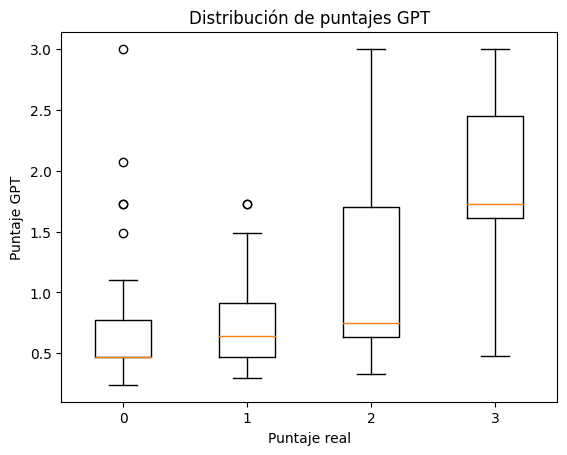

In [ ]:
show_results("Experiments/Results/20240723-1518")

In [ ]:
download()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Implementación paso a paso

In [4]:
!pip install openai==0.28 &> /dev/null
!pip install openai-multi-client &> /dev/null
!git clone https://github.com/rilianx/GPTEvaluator &> /dev/null

## Cargar dataset

In [6]:
import pandas as pd
from IPython.display import display

# Muestra información relevante del dataset
def show_dataset_info(dataset):
    display(dataset.head())
    print()
    print(dataset.value_counts("real_eval"), end="\n\n")
    print(dataset.value_counts("dataset"))
    pass

# Carga un dataset a partir de un archivo xlsx y valida sus columnas
def load_dataset(path, sheet_name, column_data):
    df = pd.read_excel(path, sheet_name=sheet_name)

    mandatory_cols = ["context", "question", "answer", "real_eval", "dataset"]
    for key in mandatory_cols:
        if key not in column_data.keys():
            raise Exception(f"Error: Debe especificar la columna para la variable {key}")

        value = column_data[key]
        if value not in df.columns:
            raise Exception(f"Error: La columna {value} no existe")

        df = df.rename(columns={value: key})

    df = df[mandatory_cols]
    show_dataset_info(df)
    return df

In [7]:
column_data = {
    "context": "Contexto",
    "question": "Pregunta",
    "answer": "Respuesta",
    "real_eval": "Promedio Redondeado",
    "dataset": "DatasetProveniente"
}

df = load_dataset("datasets_v2.xlsx", "AllDatasets (1dif)", column_data)

,context,question,answer,real_eval,dataset
0,Un montículo binario se mantiene completo inse...,¿Cómo se asegura que un montículo binario mant...,Para asegurar que se mantenga balanceado se co...,0,C3-Sample100
1,La utilidad de tener nodos con múltiples clave...,¿Cuál es e la utilidad de tener nodos con múlt...,Es útil ya que gracias a eso la altura de esos...,2,C3-Sample100
2,La utilidad de tener nodos con múltiples clave...,¿Cuál es e la utilidad de tener nodos con múlt...,El tener nodos con múltiples claves en árboles...,2,C3-Sample100
3,Los árboles binarios autobalanceables como AVL...,¿Por qué las operaciones de los árboles binari...,Los árboles AVL y rojo-negro tienen complejida...,2,C3-Sample100
4,Un problema puede resolverse utilizando grafos...,¿Qué características debería tener un problema...,Un problema para poder ser resulto con grafos ...,2,C3-Sample100



real_eval
3    127
2     75
0     52
1     36
Name: count, dtype: int64

dataset
C2-Nan                  92
C3-Sample100            91
C2-Sample100            90
C1-OscarBadAnswers20    17
Name: count, dtype: int64


## Generación prompts

In [85]:
import pprint
import copy
import json
import os
import re

class Prompt():
    def __init__(self, structure, instructions, base_folder):
        self.structure = structure
        self.instructions = instructions
        self.base_folder = base_folder
        self.raw_text_structure = None
        self.text_structure = None
        self.criteria = None
        self.output_instructions = None
        self.prompt = None

        self.read_files()
        self.extract_metadata()
        self.build_prompt()

    # Retorna la estructura base del prompt (diccionario)
    def base_structure(self):
        structure = copy.deepcopy(self.structure)
        structure['instructions'] = {}
        for i in self.instructions:
            structure['instructions'][i] = structure[i]
            structure.pop(i, None)
        return structure

    # Crea un diccionario con el contenido de cada archivo en la estructura
    def read_files(self):
        self.raw_text_structure = copy.deepcopy(self.structure)

        for key, value in self.raw_text_structure.items():
            if key == "instructions": continue

            path = f"{self.base_folder}/{key}/{value}"
            try:
                self.raw_text_structure[key] = open(path, 'r', encoding='utf-8').read()
                self.raw_text_structure[key] += "\n\n"
            except:
                raise Exception(f"Error: El archivo {path} no existe")

    # Extrae metadatos de los archivos como los criterios e instrucciones de salida
    def extract_metadata(self):
        self.text_structure = copy.deepcopy(self.raw_text_structure)

        if 'score' in self.text_structure:
            lines = self.text_structure['score'].split('\n')
            self.criteria = [line[1:] for line in lines if line.startswith('$')]
            text = [line for line in lines if not line.startswith('$')]
            self.text_structure['score'] = '\n'.join(text)

        self.output_instructions = {}
        for key, value in self.text_structure.items():
            if value.startswith('#'):
                m = re.search(r'#(.*?)\n', value).group(1)
                self.output_instructions[key] = m
                self.text_structure[key] = '\n'.join(value.split('\n')[1:])

    # Construye el prompt en formato string
    def build_prompt(self):
        self.prompt = ""
        for key, value in self.text_structure.items():
            self.prompt += value

        output = "I expect a dict in python as answer: {{"
        for key, value in self.output_instructions.items():
            output += f'"{key}": \'{value}\', '

        if len(self.criteria) > 0:
            for c in self.criteria:
                output += f'"{c}": {c}_score, '
            output = output[:-2]
        else:
            output += '"score": score'

        output += "}}\n\nPython dict:"
        self.prompt += output


# Procesa y elimina los diccionarios anidados de prompt_data
def normalize_prompt_dict(prompt_data):
    instructions = []
    if "instructions" in prompt_data:
        for (key, value) in prompt_data["instructions"].items():
            prompt_data[key] = value
            instructions.append(key)

    prompt_data["instructions"] = "Instructions:\n"
    return prompt_data, instructions

# Retorna la lista de archivos para reemplazar el comodín *
def expand_prompt_data(prompt_data, prompt_folder):
    wildcard_field = None
    for key, value in prompt_data.items():
        if value == "*":
            wildcard_field = key
            break

    if not wildcard_field: return None, None

    wildcard_files = []
    path = f"{prompt_folder}/{wildcard_field}"
    for file in sorted(os.listdir(path)):
        if os.path.isfile(os.path.join(path, file)):
            wildcard_files.append(file)

    return wildcard_field, wildcard_files

# Genera una lista con los prompts a evaluar
def generate_prompts(prompt_data, prompt_folder):
    template, instructions = normalize_prompt_dict(prompt_data)
    wildcard_field, wildcard_files = expand_prompt_data(template, prompt_folder)
    prompts = []

    if wildcard_field == None:
        prompt = Prompt(template, instructions, prompt_folder)
        prompts.append(prompt)
        print(prompt.prompt)
        return prompts

    for file in wildcard_files:
        structure = copy.deepcopy(template)
        structure[wildcard_field] = file
        prompt = Prompt(structure, instructions, prompt_folder)
        prompts.append(prompt)

    # Visualizar
    template = copy.deepcopy(prompts[0])
    template.raw_text_structure[wildcard_field] = f"{{{wildcard_field}}}\n\n"
    template.extract_metadata()
    template.build_prompt()
    print(template.prompt)

    print(f"\n\nArchivos a utilizar ({len(wildcard_files)}):\n")
    print("\n".join(wildcard_files))

    return prompts

In [74]:
prompt_data = {
    "examples": "examples_1.txt",
    "context": "knowledge_1.txt",
    "question": "question_1.txt",
    "answer": "answer_1.txt",
    "instructions": {
        "analysis": "analysis_1.txt",
        "feedback": "feedback_1.txt",
        "score": "score_2.txt",
    }
}

prompt_folder = "Miniprompts"

prompts = generate_prompts(prompt_data, prompt_folder)

**Examples:**
Q: ¿Cómo se podría implementar un historial de navegación web usando dos pilas? El historial debe permitir ir hacia atrás y adelante con las páginas previamente visitadas. Describa un algoritmo.
Incorrect Answer: Usamos dos pilas para ir hacia adelante y hacia atrás en el historial.  (Score: 0)

Q: ¿Cómo se busca un valor en un árbol rojo-negro? Explique el proceso paso a paso.
Incorrect Answer: PAra buscar el valor en un árbol rojo-negro debemos pasar por nodos rojos y negros hasta encontrar el valor. (Score: 0)

Q: ¿Por qué el acceso a un elemento específico en un arreglo es O(1), es decir, no depende de la cantidad de datos?
Incorrect Answer: El acceso es O(1) por que toma un tiempo constante y no depende de la cantidad de datos. (Score: 0)

Q: ¿Cuando se recomienda utilizar arreglos en vez de listas enlazadas? Haga referencia a complejidades temporales en su explicación.
Incorrect Answer: Un arreglo es recomendable en determinadas situaciones, mientras que la lista en

## Optimización parámetros

In [43]:
from scipy.optimize import differential_evolution
import numpy as np


### Optimización de cortes y ponderaciones ###
class CutsEvaluator():
    @staticmethod
    def f(x, theta):
        score = np.dot(x, theta[:-3])
        y_pred = np.where(score > theta[-1], 3, np.where(score > theta[-2], 2, np.where(score > theta[-3], 1, 0)))
        return y_pred

class CutsOptimizer():
    def __init__(self, criteria_scores, real_scores):
        bounds =  [(0, 1) for _ in range(len(criteria_scores[0]))] + [(1, 4), (4, 7), (7, 10)]
        result = differential_evolution(self.error, bounds, args=(criteria_scores, real_scores), seed=1, strategy='rand1exp', mutation=(0,1), recombination=1)
        self.params = result.x.tolist()

    def error(self, theta, x, y):
        y_pred = CutsEvaluator.f(x, theta)
        mse = np.mean((y - y_pred) ** 2)
        penalty = 1e6 * np.abs(np.sum(theta[:-3]) - 1)
        return mse + penalty


####### Optimización mapeo de puntajes ########
class MapEvaluator():
    @staticmethod
    def inverse_map(y_pred, theta):
        a, b = theta[-2], theta[-1]
        def single_inverse_map(y):
            if y <= a:
                return y / a
            elif a < y <= b:
                return 1 + (y - a) / (b - a)
            else:
                return 2 + (y - b) / (10 - b)

        return np.array([single_inverse_map(y) for y in y_pred])

    @staticmethod
    def f(x, theta):
        y_pred = np.dot(x, theta[:-2])
        return MapEvaluator.inverse_map(y_pred, theta)

class MapOptimizer():
    def __init__(self, criteria_scores, real_scores):
        bounds =  [(0, 1) for _ in range(len(criteria_scores[0]))] + [(1, 9), (1, 9)]
        result = differential_evolution(self.error, bounds, args=(criteria_scores, real_scores), seed=1, strategy='rand1exp', mutation=(0,1), recombination=1)
        self.params = result.x.tolist()

    def error(self, theta, x, y):
        y_pred = MapEvaluator.f(x, theta)
        mse = np.sum((y - y_pred) ** 2)
        penalty = 1e6 * np.abs(np.sum(theta[:-2]) - 1)
        a, b = theta[-2], theta[-1]
        if a > b: penalty += (a - b) * 1e5
        return mse + penalty

# Convierte una lista de diccionarios en una lista de tuplas
def get_x(gpt_dicts, criteria):
    if len(criteria) > 0:
        return [
            [gpt_dict[key] for key in criteria]
            for gpt_dict in gpt_dicts
        ]

    return [[gpt_dict['score']] for gpt_dict in gpt_dicts]

# Obtiene los parámetros óptimos para disminuir el error
def optimize_params(gpt_dicts, real_scores, criteria, eval_function):
    criteria_scores = get_x(gpt_dicts, criteria)
    if eval_function == "map":
        optimizer = MapOptimizer(criteria_scores, real_scores)
    if eval_function == "cuts":
        optimizer = CutsOptimizer(criteria_scores, real_scores)

    return optimizer.params

# Convierte los puntajes GPT a puntajes normalizados (0-3)
def convert_gpt_scores(gpt_dicts, real_scores, criteria, eval_function, eval_params):
    criteria_scores = get_x(gpt_dicts, criteria)
    if eval_function == "map":
        return MapEvaluator.f(criteria_scores, eval_params)
    if eval_function == "cuts":
        return CutsEvaluator.f(criteria_scores, eval_params)

In [34]:
gpt_dicts = [
    {
        'score': 9
    },
    {
        'score': 8
    },
    {
        'score': 4
    }
]

real_scores = [3, 2, 1]
criteria = []

eval_params = optimize_params(gpt_dicts, real_scores, criteria, "map")
print(eval_params)
convert_gpt_scores(gpt_dicts, real_scores, criteria, "map", eval_params)

[1.0, 4.000037881048441, 7.4999888512711514]


array([2.60000178, 2.20000357, 0.99999053])

In [39]:
gpt_dicts = [
    {
        'relevance': 8,
        'clarity': 9,
        'precision': 7
    },
    {
        'relevance': 8,
        'clarity': 5,
        'precision': 3
    },
    {
        'relevance': 4,
        'clarity': 1,
        'precision': 2
    }
]

real_scores = [3, 2, 1]
criteria = ['relevance', 'clarity', 'precision']

eval_params = optimize_params(gpt_dicts, real_scores, criteria, "map")
print(eval_params)
convert_gpt_scores(gpt_dicts, real_scores, criteria, "map", eval_params)

[0.007063405579985471, 0.9736191598576271, 0.01931743420011689, 1.0250005164759606, 4.822870728613848]


array([2.79801581, 2.03084424, 1.00408311])

## Experimentos

In [86]:
import random
from GPTEvaluator.GPTEvaluator import chat_gpt_multiple
from openai_multi_client import OpenAIMultiClient
import openai
from google.colab import userdata
from sklearn.metrics import mean_squared_error

openai.api_key = userdata.get('api_key')

class SetPair():
    def __init__(self, train_set, test_set):
        self.train_set = train_set
        self.test_set = test_set

# Divide el dataset en conjuntos de entrenamiento/prueba
def generate_sets(dataset, repetitions, train_set_size=60, test_set_size=100, group_size=15, seed=42):
    sets = []
    random.seed(seed)

    group_size = train_set_size // 4
    for i in range(repetitions):
        train_set = dataset.groupby('real_eval', group_keys=False).apply(lambda x: x.sample(group_size, random_state=random.randint(0,100000)))
        test_set = dataset[~dataset.index.isin(train_set.index)]
        test_set = dataset.sample(n=test_set_size, random_state=random.randint(0,100000))
        sets.append(SetPair(train_set, test_set))

    return sets

# Genera las respuestas con ChatGPT
def eval_gpt(df, prompt):
    api = OpenAIMultiClient(endpoint="chats", data_template={"model": "gpt-4o-mini", "temperature": 0.1, "n": 1, "timeout":10}, concurrency=50, wait_interval=1, max_retries=3, retry_max=10, retry_multiplier=1)

    texts = []
    for i, row in df.iterrows():
        text = prompt.format(Question=row['question'], Answer=row['answer'], Context=row['context'])
        texts.append(text)

    answers_gpt = chat_gpt_multiple(api, texts)
    return answers_gpt

# Extrae diccionario de salida de las respuestas GPT
def extract_dicts(answers_gpt):
    pattern = r'\{[^{}]+\}'

    gpt_dicts = []
    for answer_gpt in answers_gpt:
        try:
            answer = re.findall(pattern, answer_gpt[0])[0]
            gpt_dicts.append(eval(answer))
        except Exception as e:
            print(f"Error al extraer diccionario. Respuesta GPT: \n{answer_gpt[0]}\n\n")
            gpt_dicts.append(None)

    return gpt_dicts

# Elimina filas del dataset donde hubo errores en la salida GPT
def clean_set(dataset, gpt_dicts):
    for i in reversed(range(len(gpt_dicts))):
        if gpt_dicts[i] == None:
            gpt_dicts.pop(i)
            dataset.drop(index=i)

# Obtiene los puntajes reales de un dataset
def get_real_scores(dataset):
    return dataset['real_eval'].tolist()

# Prepara el set de entrenamiento y obtiene los parámetros óptimos para disminuir el error
def train(train_set, prompt, criteria, eval_function):
    answers_gpt = eval_gpt(train_set, prompt)
    gpt_dicts = extract_dicts(answers_gpt)
    clean_set(train_set, gpt_dicts)
    real_scores = get_real_scores(train_set)
    return optimize_params(gpt_dicts, real_scores, criteria, eval_function)

# Prepara el set de prueba y calcula las métricas del modelo preentrenado usando el conjunto de prueba
def test(test_set, prompt, criteria, eval_function, eval_params):
    answers_gpt = eval_gpt(test_set, prompt)
    gpt_dicts = extract_dicts(answers_gpt)
    clean_set(test_set, gpt_dicts)
    real_scores = get_real_scores(test_set)
    pred_scores = convert_gpt_scores(gpt_dicts, real_scores, criteria, eval_function, eval_params)

    result_set = test_set.copy(deep=True)
    result_set['gpt_eval'] = pred_scores
    return calculate_mse(result_set)

# Retorna un dataset con el MSE por grupo
def calculate_mse(result_set):
    stats = result_set.groupby('dataset').apply(lambda x: mean_squared_error(x['real_eval'], x['gpt_eval'])).reset_index()
    stats = stats.rename(columns={0: 'MSE'})

    row = {
        "dataset": "All",
        "MSE": mean_squared_error(result_set['real_eval'], result_set['gpt_eval'])
    }
    df_row = pd.DataFrame([row])
    return pd.concat([df_row, stats], ignore_index=True)

# Evalúa una lista de prompts obtienendo el MSE promedio en M repeticiones
def experiment(dataset, prompts, repetitions, eval_function, eval_params=None, train_set_size=60, test_set_size=100, seed=42):
    sets = generate_sets(dataset, repetitions, train_set_size, test_set_size, seed)
    stats = []

    for i, prompt_data in enumerate(prompts):
        prompt = prompt_data.prompt
        criteria = prompt_data.criteria
        stats.append([])

        for j in range(repetitions):
            train_set = sets[j].train_set
            test_set = sets[j].test_set

            iter_params = eval_params
            if not eval_params:
                print(f"Entrenando Prompt {i+1} con Train Set {j+1}")
                iter_params = train(train_set, prompt, criteria, eval_function)

            print(f"\nEvaluando Prompt {i+1} con Test Set {j+1}")
            metrics = test(test_set, prompt, criteria, eval_function, iter_params)
            stats[i].append(metrics)
            print()

    # Promediar MSE/dataset por prompt
    for i in range(len(stats)):
        p = pd.concat(stats[i], ignore_index=True)
        p = p.groupby('dataset')['MSE'].mean().reset_index()
        p = p.set_index('dataset').transpose()
        p = p.reset_index(drop=True, names=None)
        p.columns.name = None
        p.insert(loc=0, column='Prompt', value=prompts[i].base_structure())
        stats[i] = p

    stats = pd.concat(stats, ignore_index=True)
    display(stats)

    return stats

In [96]:
x = experiment(df, prompts, repetitions=1, eval_function="map", eval_params=None, train_set_size=4, test_set_size=4, seed=42)

Entrenando Prompt 1 con Train Set 1
1-3-2-0-
Evaluando Prompt 1 con Test Set 1
2-1-3-0-


,Prompt,All,C1-OscarBadAnswers20,C2-Nan,C2-Sample100,C3-Sample100
0,"{\n ""examples"": ""examples_1.txt"",\n ""con...",0.247302,0.337852,0.137724,0.175778,0.337852
